In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [7]:
def func(x):
    return x[0]**2 + 2*x[1]**2 + (math.e)**(x[0] + x[1])

In [8]:
class SMPLX:
    
    def __init__(self, func, n = 2, m = 0.5, eps = 0.0001, initP = (1, 1)):
        
        self.n = n          # Размерность
        self.m = m          # Длинна ребра симплекса
        self.eps = eps      # Точность поиска
        self.func = func    # Оптимизируемая функция
        self.counter = 0    # Счетчик итераций
        
        # Симплекс
        self.base = np.full_like(np.empty((n+1, n+1)), list(initP) + [0])
        
        # Приращения
        d1 = ((math.sqrt(n + 1) - 1)/(n*math.sqrt(2)))*m
        d2 = ((math.sqrt(n + 1) + n - 1)/(n*math.sqrt(2)))*m
        
        # Вычисление координат вершин симплекса
        for i in range(1, n+1):
            for j in range(n):
                self.base[i,j] += d1 if i == j+1 else d2
        
        # Вычисление значений функции в вершинах симплекса
        self.base[:,-1] = [self.func(p) for p in self.base[:,:-1]]
        
        self.baseHist = [*self.base.copy()]        # Таблица точек, составлявших симплекс
        self.baseHistSS = [self.base.copy(),]      # Состояния симплекса
        mi = np.argmin(self.base[:,-1])
        self.minPHist = [self.base[mi,:-1].copy()] # Найденные точки минимумов
        self.minFHist = [self.base[mi,-1].copy()]  # Значения функции в точке минимумов
        
            
    def execute(self):
        
        while True:
            
            # Номер вершины с наибольшим значением целевой функции
            h = np.argmax(self.base[:,-1])
            
            # Вычисление координат центра тяжести, отраженной точки и значения функции в ней
            xc = (1/self.n)*np.sum(np.delete(self.base[:,:-1], h, axis=0), axis=0)
            xr = 2*xc - self.base[h,:-1]
            fr = self.func(xr)
            
            # Проверка уменьшения значения целевой функции
            if fr < self.func(self.base[h,:-1]):
                
                # Замена худшей точки симплекса отраженной
                self.base[h,:] = list(xr) + [fr]
                
                # Добавление новой точки в таблицу
                self.baseHist.append(self.base[h,:].copy())
                
            else:
                
                # Операция редукции
                r = np.argmin(self.base[:,-1])
                minP = self.base[r,:-1]
                scale = lambda x: minP + self.m*(x-minP)
                self.base[:,:-1] = scale(self.base[:,:-1])
                self.base[:,-1] = [self.func(p) for p in self.base[:,:-1]]
                
                # Добавление новых точек в таблицу
                self.baseHist.extend(np.delete(self.base, r, axis=0))
            
            # Сохранение текущего состояния симплекса и увелечение счетчика
            self.baseHistSS.append(self.base.copy())
            mi = np.argmin(self.base[:,-1])
            self.minPHist.append(self.base[mi,:-1].copy())
            self.minFHist.append(self.base[mi,-1].copy())
            self.counter += 1
            
            # Вычисление значения функции в центре тяжести симплекса
            cgF = self.func((1/(self.n+1))*np.sum(self.base[:,:-1], axis=0))
            
            # Проверка условия окончания процесса вычислений
            if np.all(abs(self.base[:,-1] - cgF) < eps):
                break


In [9]:
fun = func
n = 2
m = 0.5
eps = 0.0001
initP = (-4, 4)

smplx = SMPLX(fun, n, m, eps, initP)
smplx.execute()

In [10]:
resSS = [list(map(lambda x: list(x)[:-1], ss)) for ss in smplx.baseHistSS]
minP = smplx.minPHist
minF = smplx.minFHist

print(f'\n\nНайденная точка минимума: {tuple(minP[-1])}\n')
print(f'Найденный минимум: {minF[-1]}\n')
print(f'Количество итераций: {smplx.counter}\n\n')
print(f'Таблица точек симплекса:\n')
print('{0:>10}  {1:>10}  {2:>15}\n'.format('x1', 'x2', 'func(x1, x2)'))
for p in smplx.baseHist:
    print('{0:10.5f}  {1:10.5f}  {2:15.5f}'.format(p[0], p[1], p[2]))



Найденная точка минимума: (-0.31495303200967845, -0.15389461406991906)

Найденный минимум: 0.7722854240841788

Количество итераций: 31


Таблица точек симплекса:

        x1          x2     func(x1, x2)

  -4.00000     4.00000         49.00000
  -3.87059     4.48296         57.02019
  -3.51704     4.12941         48.31840
  -3.64645     3.64645         40.88972
  -3.16348     3.77586         40.36661
  -3.29289     3.29289         33.52944
  -2.80993     3.42230         33.16482
  -2.93934     2.93934         26.91916
  -2.45638     3.06875         26.71304
  -2.58579     2.58579         21.05887
  -2.10282     2.71520         21.01125
  -2.23223     2.23223         15.94859
  -1.74927     2.36164         16.05946
  -1.87868     1.87868         11.58831
  -2.36164     1.74927         12.23931
  -2.00809     1.39572          8.47054
  -1.52513     1.52513          7.97803
  -1.65454     1.04216          5.45176
  -1.17157     1.17157          5.11775
  -1.30098     0.68861          3.

<IPython.core.display.Javascript object>


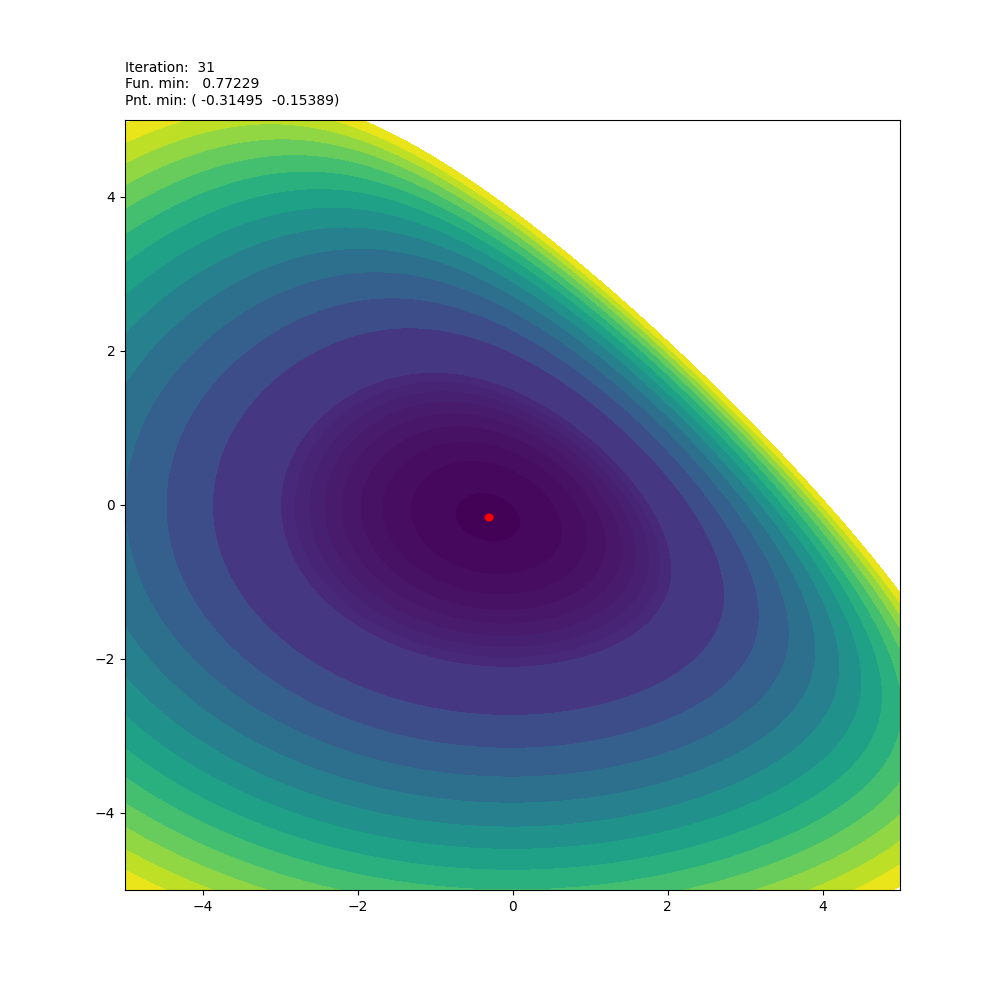

In [11]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = func((X, Y))

figA = plt.figure(figsize=(10, 10))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, np.concatenate((np.arange(0, 10, 1), np.arange(15, 80, 5))))


scat = axA.scatter([], [], s=20, c='red')
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Iteration: {0:3d}\nFun. min: {1:9.5f}\nPnt. min: ({2:9.5f} {3:9.5f})'.format(i, minF[i], minP[i][0], minP[i][1]))
    scat.set_offsets(resSS[i])
    
anim1 = FuncAnimation(figA, animate, frames=len(resSS), interval=1000, repeat=False)